### Data Loading and Exploration 

##### Import Required Libraries

###### Basic Python Libraries

In [2]:
import os           #for path operation 
import warnings       #for ignore warning messages
warnings.filterwarnings('ignore')

###### Data manipulation and analysis

In [3]:
import pandas as pd
import numpy as np

###### Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Exploratory Data Analysis

###### Statistical Summary

In [34]:
from scipy import stats
from scipy.stats import skew,kurtosis

###### Display Settings

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)

###### Data Cleaning Helpers

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

###### MySql Connection 

In [8]:
import mysql.connector
from sqlalchemy import create_engine

In [9]:
print("Now all required libraries are imported successfully")

Now all required libraries are imported successfully


##### Set Folder path

In [10]:
Folder_path=r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data"

##### Load All files(csv)

In [11]:
appointments=pd.read_csv(os.path.join(Folder_path,"appointments.csv"))
billing=pd.read_csv(os.path.join(Folder_path,"billing.csv"))
doctors=pd.read_csv(os.path.join(Folder_path,"doctors.csv"))
patients=pd.read_csv(os.path.join(Folder_path,"patients.csv"))
treatments=pd.read_csv(os.path.join(Folder_path,"treatments.csv"))

### Basic Exploratory Data Analyst(Check structure of each dataset)

In [12]:
for name,df in {
    "Appointments":appointments,
    "Billing":billing,
    "Doctors":doctors,
    "Patients":patients,
    "Treatments":treatments
}.items():
    print(f"---{name}---")
    print(df.shape)               #No.of rows/columns
    print(df.isnull().sum())           #Missing Values
    print(df.columns)             #name of columns
    print()

---Appointments---
(200, 7)
appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status'], dtype='object')

---Billing---
(200, 7)
bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64
Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status'], dtype='object')

---Doctors---
(10, 8)
doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64
Index(['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email'], dtype='object')

---Pat

#### Normality Check(Visual+Statistical)

##### Visual check(Histogram + Q-Q plot) (for Apppointmentstable)

In [13]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [14]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_method  200 non-null    object 
 6   payment_status  200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


#### Normality Check (Visual+Statistical)

##### Visual Check (Histogram +Q-Q plot ) (For amount)

In [17]:
col_name=['amount']
for col in col_name:
    plt.figure(figsize=(7,3))

    plt.subplot(1,2,1)
    sns.histplot(billing[col],kde=True,bins=30)
    plt.title(f"Histogramof {col}")

    plt.subplot(1,2,2)
    stats.probplot(billing[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()
    

##### Statistical method(Shapiro-Wilk test)

In [30]:
from scipy.stats import shapiro

for col in col_name:
    stat,p=shapiro(billing[col].dropna())
    print(f"{col} -> p-value = {p:.5f}")

amount -> p-value = 0.00000


In [21]:
#### Outlier Detection (IQR Method)
for col in col_name:
    Q1=billing[col].quantile(0.25)
    Q3=billing[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+ 1.5*IQR
    outliers=billing[(billing[col]<lower) | (billing[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

amount:0 outliers


#### Outlier visualization(Boxplots)

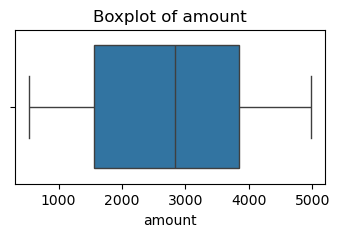

In [22]:
for col in col_name:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=billing[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
#### check wheather duplicate exists

In [23]:
billing.duplicated().sum()

0

In [ ]:
#### now check for another table normality nd outliers (doctors)

In [24]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         10 non-null     object
 1   first_name        10 non-null     object
 2   last_name         10 non-null     object
 3   specialization    10 non-null     object
 4   phone_number      10 non-null     int64 
 5   years_experience  10 non-null     int64 
 6   hospital_branch   10 non-null     object
 7   email             10 non-null     object
dtypes: int64(2), object(6)
memory usage: 772.0+ bytes


In [27]:
#### Normality check for (years_exp col)

In [35]:
col_name1=['years_experience']
for col in col_name1:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(doctors[col],kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(doctors[col], dist="norm",plot=plt)
    plt.title(f"QQ Plot of {col}") 

In [31]:
## statistcal check 
for col in col_name1:
    stat,p=shapiro(doctors[col].dropna())
    print(f"{col} -> p-value={p:.5f}")

years_experience -> p-value=0.02315


#### Outlier Detection 

In [38]:
for col in col_name1:
    Q1=doctors[col].quantile(0.25)
    Q3=doctors[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=doctors[(doctors[col]<lower) | (doctors[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

years_experience:1 outliers


##### Outlier Visualization 

In [39]:
for col in col_name1:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=doctors[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
"""A single point appeared distant on the left side in the boxplot for years_experience.
   Upon statistical check (IQR method), it was confirmed as a minor outlier. Since the
   value was realistic, it was retained during ETL"""

In [57]:
#handling duplicate if exists
doctors.duplicated().sum()
doctors.drop_duplicates(inplace=True)

In [ ]:
### now for check another one(patients)

In [25]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          50 non-null     object
 1   first_name          50 non-null     object
 2   last_name           50 non-null     object
 3   gender              50 non-null     object
 4   date_of_birth       50 non-null     object
 5   contact_number      50 non-null     int64 
 6   address             50 non-null     object
 7   registration_date   50 non-null     object
 8   insurance_provider  50 non-null     object
 9   insurance_number    50 non-null     object
 10  email               50 non-null     object
dtypes: int64(1), object(10)
memory usage: 4.4+ KB


In [ ]:
### soo in this table we don't need to check normality nd outlier 

In [56]:
#handling duplicate if exist
patients.duplicated().sum()
patients.drop_duplicates(inplace=True)

In [ ]:
### check for next one (treatments)

In [40]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment_id    200 non-null    object 
 1   appointment_id  200 non-null    object 
 2   treatment_type  200 non-null    object 
 3   description     200 non-null    object 
 4   cost            200 non-null    float64
 5   treatment_date  200 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


#### Normality check based on the numeriacal value(cost col)

In [41]:
col_name2=['cost']
for col in col_name2:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(treatments[col],bins=20,edgecolor='black')
    plt.title(f" Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(df["cost"],dist="norm",plot=plt)
    plt.title(f"Q-Q Plot of {col}")

In [43]:
### via shapiro-wilk test
for col in col_name2:
    stat,p=shapiro(treatments[col].dropna())
    print(f"{col} -> p-value={p:.5f}")


cost -> p-value=0.00000


In [ ]:
#### Outlier check 

In [52]:
for col in col_name2:
    Q1=treatments[col].quantile(0.25)
    Q3=treatments[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=treatments[(treatments[col]<lower) | (treatments[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")
    

cost:0 outliers


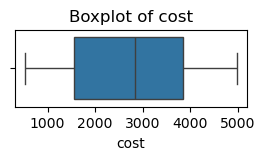

In [53]:
#### outlier visualization
for col in col_name2:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=treatments[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
""" The boxplot and statistical analysis of the cost column confirmed that there are no
    outliers. All values are within the acceptable range, so the data was retained as-is
    during the ETL process"

In [ ]:
### now every table has checked 

In [55]:
### hadling duplicate
treatments.duplicated().sum()
treatments.drop_duplicates(inplace=True)

In [58]:
for name,df in {
    "Appointments":appointments,
    "Billing":billing,
    "Doctors":doctors,
    "Patients":patients,
    "Treatments":treatments
}.items():
    print(f"---{name}---")
    print(df.shape)               #No.of rows/columns
    print(df.isnull().sum())           #Missing Values
    print(df.columns)             #name of columns
    print()

---Appointments---
(200, 7)
appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status'], dtype='object')

---Billing---
(200, 7)
bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64
Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status'], dtype='object')

---Doctors---
(10, 8)
doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64
Index(['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email'], dtype='object')

---Pat

#### Export cleaned data in the csv file


In [59]:
appointments.to_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\appointments_cleaned.csv",index=False)
billing.to_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\billing_cleaned.csv",index=False)
doctors.to_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\doctors_cleaned.csv",index=False)
patients.to_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\patients_cleaned.csv",index=False)
treatments.to_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\treatment_cleaned.csv",index=False)

### Data is importedd in mysql via python

In [60]:
import pandas as pd
import mysql.connector

In [61]:
####cleaned file path(for appointments)
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\appointments_cleaned.csv")

#### Connect to MYsql

In [122]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="hospital_management"
)
cursor=conn.cursor()

In [123]:
print(df.columns)

Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status'], dtype='object')


In [124]:
df.rename(columns={
    'appointment_id':'appointment_id',
    'patient_id':'patient_id',
    'doctor_id':'doctor_id',
    'appointment_date':'appointment_date',
    'appointment_time':'appointment_time',
    'reason_for_visit':'reason_for_visit',
    'status':'status'
},inplace=True)   
    

In [125]:
print(df.head())

  appointment_id patient_id doctor_id appointment_date appointment_time reason_for_visit     status
0           A001       P034      D009       2023-08-09         15:15:00          Therapy  Scheduled
1           A002       P032      D004       2023-06-09         14:30:00          Therapy    No-show
2           A003       P048      D004       2023-06-28          8:00:00     Consultation  Cancelled
3           A004       P025      D006       2023-09-01          9:15:00     Consultation  Cancelled
4           A005       P040      D003       2023-07-06         12:45:00        Emergency    No-show


In [126]:
#Insert data into (appointmenst)
for i,row in df.iterrows():
    cursor.execute("""
         INSERT INTO appointments (appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status)
         VALUES (%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['appointment_id'],
        row['patient_id'],
        row['doctor_id'],
        row['appointment_date'],
        row['appointment_time'],
        row['reason_for_visit'],
        row['status']
    ))
conn.commit()
print("Data imported successfully")
cursor.close()
conn.close()

Data imported successfully


In [80]:
### Insert into(billing)
df2=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\billing_cleaned.csv")

In [81]:
df2.columns

Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status'], dtype='object')

In [99]:
df2.rename(columns={
    'bill_id':'bill_id',
    'patient_id':'patient_id',
    'treatment_id':'treatment_id',
    'bill_date':'bill_date',
    'amount':'amount',
    'payment_method':'payment_method',
    'payment_status':'payment_status'
},inplace=True)
           

In [100]:
df2.head()

bill_id patient_id treatment_id   bill_date   amount payment_status payment_status
0    B001       P034         T001  2023-08-09  3941.97      Insurance        Pending
1    B002       P032         T002  2023-06-09  4158.44      Insurance           Paid
2    B003       P048         T003  2023-06-28  3731.55      Insurance           Paid
3    B004       P025         T004  2023-09-01  4799.86      Insurance         Failed
4    B005       P040         T005  2023-07-06   582.05    Credit Card        Pending

In [128]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="hospital_management"
)
cursor=conn.cursor()


In [129]:
# Insert data into(billing)
for i,row in df2.iterrows():
    cursor.execute("""
          INSERT INTO billing (bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status)
          VALUES (%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['bill_id'],
        row['patient_id'],
        row['treatment_id'],
        row['bill_date'],
        float(row['amount']),
        row['payment_method'],
        row['payment_status']
    ))
conn.commit()
print("Data imported successfully")
cursor.close()
conn.close()
        

Data imported successfully


In [97]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_method  200 non-null    object 
 6   payment_status  200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


In [ ]:
### in

In [105]:
print(df2.isnull().sum())


bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_status    0
payment_status    0
dtype: int64


In [106]:
print(df2.head(3))

  bill_id patient_id treatment_id   bill_date   amount payment_status payment_status
0    B001       P034         T001  2023-08-09  3941.97      Insurance        Pending
1    B002       P032         T002  2023-06-09  4158.44      Insurance           Paid
2    B003       P048         T003  2023-06-28  3731.55      Insurance           Paid


In [107]:
df2.rename(columns={'payment_status': 'payment_method'}, inplace=True)


In [108]:
print(df2.columns)


Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_method'], dtype='object')


In [112]:
print(df2.head(3))

  bill_id patient_id treatment_id   bill_date   amount payment_method payment_status
0    B001       P034         T001  2023-08-09  3941.97      Insurance        Pending
1    B002       P032         T002  2023-06-09  4158.44      Insurance           Paid
2    B003       P048         T003  2023-06-28  3731.55      Insurance           Paid


In [110]:
df2.columns = ['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']


In [111]:
print(df2.columns)


Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status'], dtype='object')


In [117]:
# Convert bill_date to proper format
df2['bill_date'] = pd.to_datetime(df2['bill_date'], errors='coerce').dt.date

# Replace NaN with ''
df2 = df2.fillna('')

# Convert all to str except amount
df2 = df2.astype({'patient_id': str, 'treatment_id': str, 'payment_method': str, 'payment_status': str})


In [130]:
### Insert data into(doctors)
df3=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\doctors_cleaned.csv")

In [131]:
df3.columns

Index(['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email'], dtype='object')

In [136]:
df3.rename(columns={
    'doctor_id':'doctor_id',
    'first_name':'first_name',
    'last_name':'last_name',
    'specialization':'specialization',
    'phone_number':'phone_number',
    'years_experience':'years_experience',
    'hospital_branch':'hospital_branch',
    'email':'email'
},inplace=True)


In [137]:
df3.head()

doctor_id first_name last_name specialization  phone_number  years_experience   hospital_branch                         email
0      D001      David    Taylor    Dermatology    8322010158                17   Westside Clinic  dr.david.taylor@hospital.com
1      D002       Jane     Davis     Pediatrics    9004382050                24   Eastside Clinic    dr.jane.davis@hospital.com
2      D003       Jane     Smith     Pediatrics    8737740598                19   Eastside Clinic    dr.jane.smith@hospital.com
3      D004      David     Jones     Pediatrics    6594221991                28  Central Hospital   dr.david.jones@hospital.com
4      D005      Sarah    Taylor    Dermatology    9118538547                26  Central Hospital  dr.sarah.taylor@hospital.com

In [140]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    username="root",
    password="@priya123#ni56",
    database="hospital_management"
)
cursor=conn.cursor()

In [142]:
#Insert data into(doctors)
for i,row in df3.iterrows():
    cursor.execute("""
            INSERT INTO doctors(doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email)
            VALUES (%s,%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['doctor_id'],
        row['first_name'],
        row['last_name'],
        row['specialization'],
        row['phone_number'],
        row['years_experience'],
        row['hospital_branch'],
        row['email']
    ))
conn.commit()
print("Data's imported successfully")
cursor.close()
conn.close()

Data's imported successfully


In [143]:
###now it's time to move on another table to insert data(patients)
df4=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\patients_cleaned.csv")

In [145]:
df4.columns

Index(['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email'], dtype='object')

In [146]:
df4.rename(columns={
    'patient_id':'patient_id',
    'first_name':'first_name',
    'last_name':'last_name',
    'gender':'gender',
    'date_of_birth':'date_of_birth',
    'contact_number':'contact_number',
    'address':'address',
    'registration_date':'registration_date',
    'insurance_provider':'insurance_provider',
    'insurance_number':'insurance_number',
    'email':'email'
},inplace=True)    
           

In [147]:
df4.head()

patient_id first_name last_name gender date_of_birth  contact_number       address registration_date insurance_provider insurance_number                     email
0       P001      David  Williams      F    1955-06-04      6939585183   789 Pine Rd        2022-06-23       WellnessCorp        INS840674   david.williams@mail.com
1       P002      Emily     Smith      F    1984-10-12      8228188767  321 Maple Dr        2022-01-15        PulseSecure        INS354079      emily.smith@mail.com
2       P003      Laura     Jones      M    1977-08-21      8397029847  321 Maple Dr        2022-02-07        PulseSecure        INS650929      laura.jones@mail.com
3       P004    Michael   Johnson      F    1981-02-20      9019443432    123 Elm St        2021-03-02        HealthIndia        INS789944  michael.johnson@mail.com
4       P005      David    Wilson      M    1960-06-23      7734463155    123 Elm St        2021-09-29       MedCare Plus        INS788105     david.wilson@mail.com

In [149]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    username="root",
    password="@priya123#ni56",
    database="hospital_management"
)
cursor=conn.cursor()

In [151]:
####insert data
for i,row in df4.iterrows():
    cursor.execute("""
           INSERT INTO patients (patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email)
           VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
   """,(
        row['patient_id'],
        row['first_name'],
        row['last_name'],
        row['gender'],
        row['date_of_birth'],
        row['contact_number'],
        row['address'],
        row['registration_date'],
        row['insurance_provider'],
        row['insurance_number'],
        row['email']
    ))
conn.commit()
print("Data imported successfully")
cursor.close()
conn.close()

Data imported successfully


In [153]:
##### insertion of data in the last table(treatment)
df5=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Hospital Management Project (Mysql,Python(ETL),Power BI)\data\cleaned_data\treatment_cleaned.csv")

In [154]:
df5.columns

Index(['treatment_id', 'appointment_id', 'treatment_type', 'description', 'cost', 'treatment_date'], dtype='object')

In [155]:
df5.rename(columns={
    'treatment_id':'treatment_id',
    'appointment_id':'appointment_id',
    'treatment_type':'treatment_type',
    'description':'description',
    'cost':'cost',
    'treatment_date':'treatment_date'
},inplace=True)

In [156]:
df5.head()

treatment_id appointment_id treatment_type         description     cost treatment_date
0         T001           A001   Chemotherapy     Basic screening  3941.97     2023-08-09
1         T002           A002            MRI   Advanced protocol  4158.44     2023-06-09
2         T003           A003            MRI  Standard procedure  3731.55     2023-06-28
3         T004           A004            MRI     Basic screening  4799.86     2023-09-01
4         T005           A005            ECG  Standard procedure   582.05     2023-07-06

In [160]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    username="root",
    password="@priya123#ni56",
    database="hospital_management"
)
cursor=conn.cursor()

In [161]:
# insert data 
for i,row in df5.iterrows():
    cursor.execute("""
         INSERT INTO treatments(treatment_id,appointment_id,treatment_type,description,cost,treatment_date)
         VALUES (%s,%s,%s,%s,%s,%s)
    """,(
        row['treatment_id'],
        row['appointment_id'],
        row['treatment_type'],
        row['description'],
        row['cost'],
        row['treatment_date']
    ))
conn.commit()
print("Data imported successfully")
cursor.close()
conn.close()
   

Data imported successfully


In [ ]:
### now ETL part is completed